## <a id='toc1_1_'></a>[Отчет-прогноз по оттоку клиентов из сети провайдера](#toc0_)

## <a id='toc1_2_'></a>[Задача проекта](#toc0_)

Оператор связи «Noname» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### <a id='toc1_2_1_'></a>[Описание услуг](#toc0_)

Оператор предоставляет два основных типа услуг:
Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
Интернет. Подключение может быть двух типов:
- через телефонную линию (DSL*,* от англ. digital subscriber line, «цифровая абонентская линия»)
- оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection)
- Блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV);
- каталог фильмов (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### <a id='toc1_2_2_'></a>[Описание данных](#toc0_)

Данные состоят из файлов, полученных из разных источников:
- contract.csv — информация о договоре;
- personal.csv — персональные данные клиента;
- internet.csv — информация об интернет-услугах;
- phone.csv — информация об услугах телефонии.

Во всех файлах столбец customerID содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

Данные также находятся в тренажёре, в папке /datasets/final_provider/.


### <a id='toc1_2_3_'></a>[Цель проекта](#toc0_)

1. Загрузить данные, проверить содержание на дубликаты, пропуски и соответсвие форматов.
    - Данные, где есть цифровые значения, необходимо проверить на наличие выбросов.
    - Исправление структурных ошибок: все категориальные признаки будут приведены к нижнему регистру.
2. Собрать данные в одну таблицу, которая должна содержать необходимые признаки и целевой столбец.
    - В полученной таблице провести повторную проверку на дубликаты и пропуски. Их исправление при необходимости.
    - Провести анализ на наличие лишних полей (не несущих информацию) и случаев мультиколлинеарности, чтобы избежать "проблемы заглядывания в будущее".
3. Выделение тестовой таблицы в размере 25% от общей. Валидационной выборки в данном проекте не будет, так как настройка и обучение будет происходить при помощи кросс-валидации.
4. Построение и настройка гиперпараметров моделей машинного обучения. Поиск наилучшей модели с показателем ROC_AUC не ниже 0.85.
5. Проверка лучшей модели на тестовой выборке. Также проверить точность предсказанний при помощи метрики accuracy.
6. Общая цель проекта - снизить отток клиентов в сети провайдера.


**Содержание**<a id='toc0_'></a>    
- [Отчет-прогноз по оттоку клиентов из сети провайдера](#toc1_1_)    
  - [Задача проекта](#toc1_2_)    
    - [Описание услуг](#toc1_2_1_)    
    - [Описание данных](#toc1_2_2_)    
    - [Цель проекта](#toc1_2_3_)    
    - [Загрузка входящих данных](#toc1_2_4_)    
    - [Предварительный анализ полученных данных](#toc1_2_5_)    
    - [Дубликаты](#toc1_2_6_)    
    - [Вывод по полученным данным](#toc1_2_7_)    
  - [Предобработка и исследовательский анализ данных](#toc1_3_)    
    - [Обработка данных в таблице Contract](#toc1_3_1_)    
    - [Срок жизни контракта](#toc1_3_2_)    
    - [Вывод по сроку жизни договора](#toc1_3_3_)    
    - [Понижение регистра в таблице Contract](#toc1_3_4_)    
    - [Обработка данных в таблице Personal](#toc1_3_5_)    
    - [Обработка данных в таблице Internet](#toc1_3_6_)    
    - [Обработка данных в таблице Phone](#toc1_3_7_)    
    - [Вывод по обработке данных:](#toc1_3_8_)    
    - [Объединение данных в одну таблицу](#toc1_3_9_)    
    - [Обработка пропусков в общей таблице](#toc1_3_10_)    
    - [Добавление столбцов](#toc1_3_11_)    
    - [Вывод по обработке пропусков в общей таблице](#toc1_3_12_)    
    - [Корреляция для общей таблицы](#toc1_3_13_)    
    - [Ordinal Encoding](#toc1_3_14_)    
    - [Выводы, полученные по общей таблице с ОЕ-кодировкой:](#toc1_3_15_)    
    - [Корреляция для таблицы с OE-кодировкой](#toc1_3_16_)    
    - [Графики в исследовательском анализе](#toc1_3_17_)    
    - [Дисбаланс целевого столбца](#toc1_3_18_)    
    - [Общие выводы по исследовательскому анализу](#toc1_3_19_)    
  - [Обучение моделей](#toc1_4_)    
    - [Разбивка датасетов на тренировочную и тестовую выборки](#toc1_4_1_)    
    - [Проверка баланса распределения целевого признака](#toc1_4_2_)    
    - [Обучение моделей](#toc1_4_3_)    
      - [Логистическая регрессия](#toc1_4_3_1_)    
      - [Случайный лес](#toc1_4_3_2_)    
      - [Категориальный бустинг](#toc1_4_3_3_)    
      - [LightGBM](#toc1_4_3_4_)    
      - [Категориальный бустинг](#toc1_4_3_5_)    
      - [Сделаем итоговую таблицу для датасета с OE-кодировкой.](#toc1_4_4_1_1_)    
  - [Тестирование моделей](#toc1_5_)    
    - [LightGBM Classifier](#toc1_5_1_)    
    - [DummyClassifier](#toc1_5_2_)    
    - [Матрица ошибок для LightGBM Classifier](#toc1_5_3_)    
    - [Анализ важности признаков модели](#toc1_5_4_)    
  - [Общий вывод](#toc1_6_)    
    - [Цель проекта](#toc1_6_1_)    
    - [Данные для работы](#toc1_6_2_)    
    - [Предварительная обработка данных](#toc1_6_3_)    
    - [Исследовательский анализ данных](#toc1_6_4_)    
    - [Обучение моделей](#toc1_6_5_)    
    - [Тестирование лучшей модели](#toc1_6_6_)    
    - [Итоги](#toc1_6_7_)    
    - [Общие вопросы по проекту:](#toc1_6_8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [ ]:
#загрузим необходимые в работе модули
from IPython.display import display, HTML
display(HTML(""))

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as skl
import os
from scipy import stats
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_score, recall_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve, accuracy_score
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import phik
from phik.report import plot_correlation_matrix
from phik import report


from catboost import Pool, cv
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier


import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Первоначально напишем код, который будет отменять перенос выводимых таблиц
pd.set_option('display.expand_frame_repr', False)

In [ ]:
# Назначим константу для random_state
RANDOM_STATE = 270123

### <a id='toc1_2_4_'></a>[Загрузка входящих данных](#toc0_)

In [ ]:
try:
    df_contract = pd.read_csv('/datasets/final_provider/contract.csv') #если работа ведется не локально
except:
    df_contract = pd.read_csv('contract.csv')
try:
    df_personal = pd.read_csv('/datasets/final_provider/personal.csv') #если работа ведется не локально
except:
    df_personal = pd.read_csv('personal.csv')
try:
    df_internet = pd.read_csv('/datasets/final_provider/internet.csv') #если работа ведется не локально
except:
    df_internet = pd.read_csv('internet.csv')
try:
    df_phone = pd.read_csv('/datasets/final_provider/phone.csv') #если работа ведется не локально
except:
    df_phone = pd.read_csv('phone.csv')

Для удобства работы с данными создадим словарь с названиями таблиц, после чего посмотрим содержание и общие характеристики полученных данных.

In [ ]:
table_dictionary = {'Contract': df_contract,
                    'Personal': df_personal,
                    'Internet': df_internet,
                    'Phone': df_phone
}

In [ ]:
for table_name, table in table_dictionary.items():
    print('Размер таблицы', table_name, table.shape)
    display(table.head())
    print(table.info())
    print(table.describe(include='all').T)
    print()

Размер таблицы Contract (7043, 8)


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None
                   count unique               top  freq       mean        std    min   25%    50%    75%     max
customerID          7043   7043        7590-VHVEG     1        NaN        NaN    NaN   NaN    NaN    NaN     NaN
BeginDate           7043     77        2014-02-01   366        NaN        NaN    NaN   NaN    NaN    NaN     NaN
EndDate             7043  

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None
                count unique         top  freq      mean       std  min  25%  50%  75%  max
customerID       7043   7043  7590-VHVEG     1       NaN       NaN  NaN  NaN  NaN  NaN  NaN
gender           7043      2        Male  3555       NaN       NaN  NaN  NaN  NaN  NaN  NaN
SeniorCitizen  7043.0    NaN         NaN   NaN  0.162147  0.368612  0.0  0.0  0.0  0.0  1.0
Partner          7043      2          No  3641       NaN       NaN  NaN  NaN  NaN  NaN  NaN
Dependents       7043      2          No  4933       NaN       NaN  NaN  NaN

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None
                 count unique          top  freq
customerID        5517   5517   7590-VHVEG     1
InternetService   5517      2  Fiber optic  3096
OnlineSecurity    5517      2           No  3498
OnlineBackup      5517      2           No  3088
DeviceProtection  5517      2           No  3095
TechSupport       5517      2           No  3473
StreamingTV       5517      2           No  

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None
              count unique         top  freq
customerID     6361   6361  5575-GNVDE     1
MultipleLines  6361      2          No  3390



### <a id='toc1_2_5_'></a>[Предварительный анализ полученных данных](#toc0_)

<font color='green'> **Таблица Contract** </font></div></font>  - 7043 строк, 8 столбцов, пропусков не обнаружено, все данные сохранены в формате object кроме столбца MonthlyCharges, необходимо исправить формат данных на соответствующий где это необходимо. 7043 уникальных ID для каждого клиента. Дата первого контракта - 2014-02-01. Основной тип договора - Month-to-month. Самый распространенный способо оплаты - Electronic check. 5174 контракт имеет статус No в дате закрытия. EndDate сохранен в формате datetime, так как EndDate может быть одним из ключевых признаков ввиду того, что дата закрытия заказа указывает на то, что клиент прекратил пользоваться услугами компании, то можно превратить имеющуюся дату в 1 (подтвержденный уход), а No в 0 и сделать из этого столбца целевой.

<font color='green'> **Таблица Personal** </font></div></font> - 7043 строк, 5 столбцов, пропусков не обнаружено, все данные сохранены в формате object кроме столбца SeniorCitizen, необходимо исправить формат данных на соответствующий где это необходимо. Для столбца gender необходимо будет сделать OHE-кодирование, чтобы заменить категориальные данные на цифровые.



<font color='green'> **Таблица Internet** </font></div></font> - 5517 строк, 8 столбцов, пропусков не обнаружено, все данные сохранены в формате object. Столбцы OnlineSecurity,DeviceProtection, TechSupport, StreamingTV, StreamingMovies имеют значения Yes/No. Необходимо заменить эти значения на бинарные, где Yes = 1, No = 0.

<font color='green'> **Таблица Phone** </font></div></font> - 6361 строк, 2 столбца, пропусков не обнаружено, все данные сохранены в формате object. Столбец MultipleLines имеет значения Yes/No. Необходимо заменить эти значения на бинарные, где Yes = 1, No = 0.

Во всех таблицах присутствует столбец с customerID, который можно будет использовать при соединении таблиц.

Рассмотрим каждую таблицу более подробно.

**Таблица Contract**

In [ ]:
print('Тип договора', df_contract['Type'].unique())
print('Тип платежа', df_contract['PaymentMethod'].unique())

Тип договора ['Month-to-month' 'One year' 'Two year']
Тип платежа ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Три типа договора, четыре вида платежа.

Таблицы Contract и Personal имеют одинаковое количество строк, проверим соответствуют ли ID клиентов в этих таблицах.

In [ ]:
df_contract['customerID'].isin(df_personal['customerID']).unique()

array([ True])

Все клиенты из таблицы Contract присутствуют в таблице Personal. При слиянии таблиц здесь потерь быть не должно.

In [ ]:
df_contract['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

11 значений - пустые, но нет Nan. Видимо, это пробелы. От них надо избавиться в обработке данных.

**Таблица Personal**

In [ ]:
print('Пол пользователя', df_personal['gender'].unique())


Пол пользователя ['Female' 'Male']


В поле с полом клиента указаны два типа, Nan не обнаружен.

**Таблица Internet**

In [ ]:
print('Вид подключения', df_internet['InternetService'].unique())

Вид подключения ['DSL' 'Fiber optic']


Пользователям предлагается два типа подключения, Nan не обнаружен.

**Таблица Phone**

### <a id='toc1_2_6_'></a>[Дубликаты](#toc0_)

Проверим таблицы на дубликаты.

In [ ]:
for table_name, table in table_dictionary.items():
    print('Дубликатов в таблице', table_name, table.duplicated().sum())
    print('Уникальных пользователей в таблице', table_name, table['customerID'].nunique(), 'из', table['customerID'].shape[0]) 
    print()  

Дубликатов в таблице Contract 0
Уникальных пользователей в таблице Contract 7043 из 7043

Дубликатов в таблице Personal 0
Уникальных пользователей в таблице Personal 7043 из 7043

Дубликатов в таблице Internet 0
Уникальных пользователей в таблице Internet 5517 из 5517

Дубликатов в таблице Phone 0
Уникальных пользователей в таблице Phone 6361 из 6361



Дубликаты во всех полученных таблицах не обнаружены.

### <a id='toc1_2_7_'></a>[Вывод по полученным данным](#toc0_)

- На входе мы получили четыре таблицы, которые содержат данные о клиентах и видах услуг, которыми они пользуются.
- В данных не обнаружены дубликаты и пропуски.
- Столбец EndDate в таблице Contract со значением даты закрытия можно использовать как целевой, если заменить даты и отсутствие даты как признак ухода клиента.
- Перед объединением данных необходимо изменить формат данных на соответсвующий или сделать OHE/OE-кодирование где это возможно. Также сделать дополнительный анализ касательно удаления некоторых столбцов как малоинформативных.
- После объединения данных необходимо будет проверить как прошел процесс слияния, удалить дубликаты и обработать пропуски, если такие появились.
- Перед нами стоит задача классификации, возможно, главным показателем будет значение ROC_AUC-меры со значением 0.85.


## <a id='toc1_3_'></a>[Предобработка и исследовательский анализ данных](#toc0_)

### <a id='toc1_3_1_'></a>[Обработка данных в таблице Contract](#toc0_)

In [ ]:
# Для удобства выведем первые пять строк таблицы Contract

display(df_contract.head())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


### <a id='toc1_3_2_'></a>[Срок жизни контракта](#toc0_)

Перед тем как запустить обработку данных я хочу создать таблицы только с закрытыми договорами, чтобы посмотреть какие сроки были у закрытых договоров.

In [ ]:
#Создадим выборку с закрытыми договорами
closed_contracts = df_contract[df_contract['EndDate'] != 'No']
closed_contracts

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
13,0280-XJGEX,2015-09-01,2019-10-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3
...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,2018-11-01,2019-11-01 00:00:00,One year,Yes,Electronic check,59.80,727.8
7026,8775-CEBBJ,2019-02-01,2019-11-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35
7032,6894-LFHLY,2019-10-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,75.75,75.75
7034,0639-TSIQW,2014-03-01,2019-10-01 00:00:00,Month-to-month,Yes,Credit card (automatic),102.95,6886.25


In [ ]:
# Поменяем формат данных в полях со значением даты
closed_contracts['BeginDate'] = pd.to_datetime(closed_contracts['BeginDate'])
closed_contracts['EndDate'] = pd.to_datetime(closed_contracts['EndDate'])

# Проверим работу кода
print(closed_contracts.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7041
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        1869 non-null   object        
 1   BeginDate         1869 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              1869 non-null   object        
 4   PaperlessBilling  1869 non-null   object        
 5   PaymentMethod     1869 non-null   object        
 6   MonthlyCharges    1869 non-null   float64       
 7   TotalCharges      1869 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 131.4+ KB
None


In [ ]:
# Создадим колонку с количеством дней жизни контракта
closed_contracts['days_of_contract'] = closed_contracts['EndDate'] - closed_contracts['BeginDate']
closed_contracts

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,days_of_contract
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,61 days
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,61 days
5,9305-CDSKC,2019-03-01,2019-11-01,Month-to-month,Yes,Electronic check,99.65,820.5,245 days
8,7892-POOKP,2017-07-01,2019-11-01,Month-to-month,Yes,Electronic check,104.80,3046.05,853 days
13,0280-XJGEX,2015-09-01,2019-10-01,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1491 days
...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,2018-11-01,2019-11-01,One year,Yes,Electronic check,59.80,727.8,365 days
7026,8775-CEBBJ,2019-02-01,2019-11-01,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,273 days
7032,6894-LFHLY,2019-10-01,2019-11-01,Month-to-month,Yes,Electronic check,75.75,75.75,31 days
7034,0639-TSIQW,2014-03-01,2019-10-01,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,2040 days


In [ ]:
# Выведем максимальный, минимальный и средний срок жизни договора
print('Максимальный срок договора', closed_contracts['days_of_contract'].max())
print('Минимальный срок договора', closed_contracts['days_of_contract'].min())
print('Средний срок договора', closed_contracts['days_of_contract'].mean())


Максимальный срок договора 2191 days 00:00:00
Минимальный срок договора 30 days 00:00:00
Средний срок договора 547 days 08:26:57.977528088


In [ ]:
# Посчитаем количество самых распространенных сроков жизни договора
print(closed_contracts['days_of_contract'].value_counts(ascending=False))

31 days      198
30 days      182
61 days      123
153 days      64
92 days       63
            ... 
1552 days      2
1340 days      1
1218 days      1
1917 days      1
2161 days      1
Name: days_of_contract, Length: 131, dtype: int64


<AxesSubplot: >

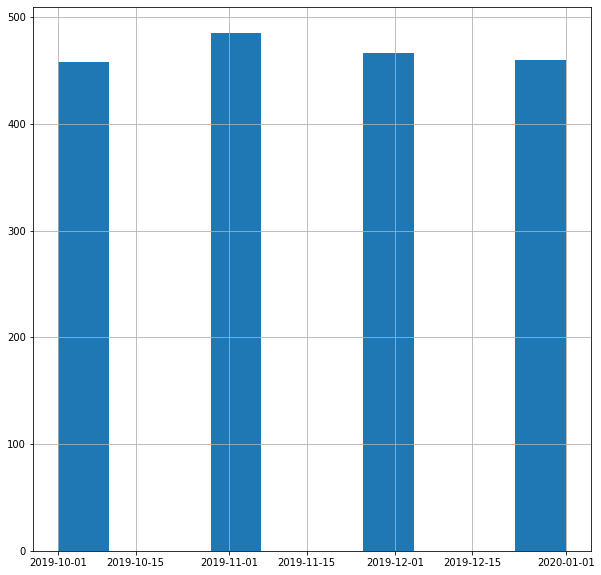

In [ ]:
closed_contracts['EndDate'].hist(figsize=(10, 10))

### <a id='toc1_3_3_'></a>[Вывод по сроку жизни договора](#toc0_)

Чаще всего клиент разрывает договор через месяц, максимум два после начала пользования услугами. Необходимо на это обратить внимание отделу маркетинга и провести опрос почему клиенты уходят.

Можно отметить, за четыре месяца с октября 2019 по январь 2020 компания теряла свыше 400 клиентов каждый месяц.

### <a id='toc1_3_4_'></a>[Понижение регистра в таблице Contract](#toc0_)

In [ ]:
#Понизим регистр в столбцах с категориальными признаками в таблице Contract
df_contract['customerID'] = df_contract['customerID'].str.lower()
df_contract['Type'] = df_contract['Type'].str.lower()
df_contract['PaperlessBilling'] = df_contract['PaperlessBilling'].str.lower()
df_contract['PaymentMethod'] = df_contract['PaymentMethod'].str.lower()
df_contract['EndDate'] = df_contract['EndDate'].str.lower()
df_contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-vhveg,2020-01-01,no,month-to-month,yes,electronic check,29.85,29.85
1,5575-gnvde,2017-04-01,no,one year,no,mailed check,56.95,1889.5
2,3668-qpybk,2019-10-01,2019-12-01 00:00:00,month-to-month,yes,mailed check,53.85,108.15
3,7795-cfocw,2016-05-01,no,one year,no,bank transfer (automatic),42.30,1840.75
4,9237-hqitu,2019-09-01,2019-11-01 00:00:00,month-to-month,yes,electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-resvb,2018-02-01,no,one year,yes,mailed check,84.80,1990.5
7039,2234-xaduh,2014-02-01,no,one year,yes,credit card (automatic),103.20,7362.9
7040,4801-jzazl,2019-03-01,no,month-to-month,yes,electronic check,29.60,346.45
7041,8361-ltmkd,2019-07-01,2019-11-01 00:00:00,month-to-month,yes,mailed check,74.40,306.6


Перед форматирование создадим столбец с целевым признаком, чтобы проще потом было с ним работать.

In [ ]:
df_contract['Target'] = df_contract['EndDate']
df_contract.loc[df_contract['Target'] != 'no', 'Target'] = 1
df_contract.loc[df_contract['Target'] == 'no', 'Target'] = 0
#проверим работу кода
df_contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Target
0,7590-vhveg,2020-01-01,no,month-to-month,yes,electronic check,29.85,29.85,0
1,5575-gnvde,2017-04-01,no,one year,no,mailed check,56.95,1889.5,0
2,3668-qpybk,2019-10-01,2019-12-01 00:00:00,month-to-month,yes,mailed check,53.85,108.15,1
3,7795-cfocw,2016-05-01,no,one year,no,bank transfer (automatic),42.30,1840.75,0
4,9237-hqitu,2019-09-01,2019-11-01 00:00:00,month-to-month,yes,electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,2018-02-01,no,one year,yes,mailed check,84.80,1990.5,0
7039,2234-xaduh,2014-02-01,no,one year,yes,credit card (automatic),103.20,7362.9,0
7040,4801-jzazl,2019-03-01,no,month-to-month,yes,electronic check,29.60,346.45,0
7041,8361-ltmkd,2019-07-01,2019-11-01 00:00:00,month-to-month,yes,mailed check,74.40,306.6,1


В столбце EndDate заменим значение 'no' на последнюю дату выгрузки - 2020-02-01. Это временная мера, после объединения таблиц столбец EndDate будет удален, так как может подсказывать значения для таргета.

In [ ]:
df_contract.loc[df_contract['EndDate'] == 'no', 'EndDate'] = '2020-02-01'

Перед изменением формата данных в столбце TotalCharges избавимся от пробелов.

In [ ]:
# Выведем строки с пробелом на экран
df_contract.loc[df_contract['TotalCharges'] == ' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Target
488,4472-lvygi,2020-02-01,2020-02-01,two year,yes,bank transfer (automatic),52.55,,0
753,3115-czmzd,2020-02-01,2020-02-01,two year,no,mailed check,20.25,,0
936,5709-lvoeq,2020-02-01,2020-02-01,two year,no,mailed check,80.85,,0
1082,4367-nuyao,2020-02-01,2020-02-01,two year,no,mailed check,25.75,,0
1340,1371-dwpaz,2020-02-01,2020-02-01,two year,no,credit card (automatic),56.05,,0
3331,7644-omvmy,2020-02-01,2020-02-01,two year,no,mailed check,19.85,,0
3826,3213-vvolg,2020-02-01,2020-02-01,two year,no,mailed check,25.35,,0
4380,2520-sgtta,2020-02-01,2020-02-01,two year,no,mailed check,20.00,,0
5218,2923-arzlg,2020-02-01,2020-02-01,one year,yes,mailed check,19.70,,0
6670,4075-wkniu,2020-02-01,2020-02-01,two year,no,mailed check,73.35,,0


Все значения с пробелом относятся к последней дате, то есть к моменту загрузки датасета, поэтому их еще не успели посчитать. По факту, клиент уже успел внести первые платежи и общие значения равны месячному платежу. Заменим пробелы на значения, указанные в столбце MonthlyCharges.

In [ ]:
df_contract.loc[df_contract['TotalCharges'] == ' ', ['TotalCharges']] = df_contract['MonthlyCharges']
#проверим работу кода
df_contract.loc[df_contract['TotalCharges'] == ' ']


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Target


In [ ]:
# Проверим работу кода по конкретному ID клиента
df_contract.loc[df_contract['customerID'] == '4472-lvygi']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Target
488,4472-lvygi,2020-02-01,2020-02-01,two year,yes,bank transfer (automatic),52.55,52.55,0


Поменяем формат данных.

In [ ]:
# Даты в виде текста приведем к формату даты
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'])
df_contract['EndDate'] = pd.to_datetime(df_contract['EndDate'])

# Для уменьшения места в памяти и сокращения времени на обработку прибыль укажем в виде целого числа
# Для этого сначала object переведем во float, а потом в int
df_contract['MonthlyCharges'] = df_contract['MonthlyCharges'].astype('float')
df_contract['TotalCharges'] = df_contract['TotalCharges'].astype('float')

df_contract['MonthlyCharges'] = df_contract['MonthlyCharges'].astype('int')
df_contract['TotalCharges'] = df_contract['TotalCharges'].astype('int')

# Проверим работу кода
display(df_contract.head())
print(df_contract.info())


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Target
0,7590-vhveg,2020-01-01,2020-02-01,month-to-month,yes,electronic check,29,29,0
1,5575-gnvde,2017-04-01,2020-02-01,one year,no,mailed check,56,1889,0
2,3668-qpybk,2019-10-01,2019-12-01,month-to-month,yes,mailed check,53,108,1
3,7795-cfocw,2016-05-01,2020-02-01,one year,no,bank transfer (automatic),42,1840,0
4,9237-hqitu,2019-09-01,2019-11-01,month-to-month,yes,electronic check,70,151,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   int32         
 7   TotalCharges      7043 non-null   int32         
 8   Target            7043 non-null   object        
dtypes: datetime64[ns](2), int32(2), object(5)
memory usage: 440.3+ KB
None


In [ ]:
# Целевой столбец оказался в формате object, изменим его на цифровой
df_contract['Target'] = df_contract['Target'].astype('int')

# Проверим работу кода
print(df_contract.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   int32         
 7   TotalCharges      7043 non-null   int32         
 8   Target            7043 non-null   int32         
dtypes: datetime64[ns](2), int32(3), object(4)
memory usage: 412.8+ KB
None


### <a id='toc1_3_5_'></a>[Обработка данных в таблице Personal](#toc0_)

In [ ]:
#Выведем часть таблицы Personal на экран
display(df_personal.head())
print(df_personal.info())

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None


In [ ]:
#Понизим регистр в столбцах с категориальными признаками в таблице Personal
df_personal['customerID'] = df_personal['customerID'].str.lower()
df_personal['gender'] = df_personal['gender'].str.lower()
df_personal['Partner'] = df_personal['Partner'].str.lower()
df_personal['Dependents'] = df_personal['Dependents'].str.lower()
# Проверим работу кода
display(df_personal.head())

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-vhveg,female,0,yes,no
1,5575-gnvde,male,0,no,no
2,3668-qpybk,male,0,no,no
3,7795-cfocw,male,0,no,no
4,9237-hqitu,female,0,no,no


Формат данных менять в таблице Personal не потребуется.

### <a id='toc1_3_6_'></a>[Обработка данных в таблице Internet](#toc0_)

In [ ]:
#Выведем часть таблицы Internet на экран
display(df_internet.head())
print(df_internet.info())

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None


In [ ]:
#Понизим регистр в столбцах с категориальными признаками в таблице Internet
df_internet['customerID'] = df_internet['customerID'].str.lower()
df_internet['InternetService'] = df_internet['InternetService'].str.lower()
df_internet['OnlineSecurity'] = df_internet['OnlineSecurity'].str.lower()
df_internet['OnlineBackup'] = df_internet['OnlineBackup'].str.lower()
df_internet['DeviceProtection'] = df_internet['DeviceProtection'].str.lower()
df_internet['TechSupport'] = df_internet['TechSupport'].str.lower()
df_internet['StreamingTV'] = df_internet['StreamingTV'].str.lower()
df_internet['StreamingMovies'] = df_internet['StreamingMovies'].str.lower()

# Проверим работу кода
display(df_internet.head())

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-vhveg,dsl,no,yes,no,no,no,no
1,5575-gnvde,dsl,yes,no,yes,no,no,no
2,3668-qpybk,dsl,yes,yes,no,no,no,no
3,7795-cfocw,dsl,yes,no,yes,yes,no,no
4,9237-hqitu,fiber optic,no,no,no,no,no,no


### <a id='toc1_3_7_'></a>[Обработка данных в таблице Phone](#toc0_)

In [ ]:
#Выведем часть таблицы Phone на экран
display(df_phone.head())
print(df_phone.info())

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None


In [ ]:
#Понизим регистр в столбцах с категориальными признаками в таблице Phone
df_phone['customerID'] = df_phone['customerID'].str.lower()
df_phone['MultipleLines'] = df_phone['MultipleLines'].str.lower()

# Проверим работу кода
display(df_phone.head())

,customerID,MultipleLines
0,5575-gnvde,no
1,3668-qpybk,no
2,9237-hqitu,no
3,9305-cdskc,yes
4,1452-kiovk,yes


### <a id='toc1_3_8_'></a>[Вывод по обработке данных:](#toc0_)

- Был проведен анализ по сроку жизни договора, необходимо обратить внимание отдела маркетинга на крайне короткие значения.
- Во всех таблицах было произведено понижение регистра, чтобы избежать появления неявных дубликатов.
- В таблице Contract значения прибыли были приведены к значению целого числа. 
- Категориальные значения с цифрами в полях переведены в цифровые.
- Были убраны пробелы в столбце с Общей прибылью в таблице Contract путем замена на соответсвующее значение в поле Прибыль за месяц.

### <a id='toc1_3_9_'></a>[Объединение данных в одну таблицу](#toc0_)

In [ ]:
# Объединим таблицы при помощи функции join
df_total = df_contract.merge(df_internet, on='customerID', how='left')
df_total = df_total.merge(df_personal, on='customerID', how='left')
df_total = df_total.merge(df_phone, on='customerID', how='left')

# Проверим работу кода
print(df_total.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   int32         
 7   TotalCharges      7043 non-null   int32         
 8   Target            7043 non-null   int32         
 9   InternetService   5517 non-null   object        
 10  OnlineSecurity    5517 non-null   object        
 11  OnlineBackup      5517 non-null   object        
 12  DeviceProtection  5517 non-null   object        
 13  TechSupport       5517 non-null   object        
 14  StreamingTV       5517 n

Ввиду несоответствия размеров таблиц в общей таблице образовались пропуски. Общая таблица получилась размером 7043 строки и 20 столбцов.

### <a id='toc1_3_10_'></a>[Обработка пропусков в общей таблице](#toc0_)

Рассмотрим какие столбцы содержат пропуски.

In [ ]:
df_total.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Target                 0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        682
dtype: int64

- Пропуски в столбце MultipleLines могут означать, что клиент не пользуется услугами телефонии от данного провайдера, поэтому пропуски будут заменены на "unknown".
- Пропуски в столбцах, полученные из таблицы Internet, могут означать, что клиенты не пользуются интернет-услугами, поэтому все пропуски можно заменить на значение "no".

In [ ]:
# Обработаем пропуски в столбце MultipleLines
df_total['MultipleLines'] = df_total['MultipleLines'].fillna('unknown')

In [ ]:
# Обработаем пропуски в столбцах c информацией об услугах интернета

df_total[['InternetService', 'OnlineSecurity', 
          'OnlineBackup', 'DeviceProtection', 
          'TechSupport', 'StreamingTV', 
          'StreamingMovies']] = \
          df_total[['InternetService', 'OnlineSecurity', 
                    'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 
                    'StreamingMovies']].fillna('no')

### <a id='toc1_3_11_'></a>[Добавление столбцов](#toc0_)

Добавим в общую таблицу столбец с количеством дней от дня подписания до дня разрыва договора.

In [ ]:
# Добавление столбца
df_total['contract_days'] = df_total['EndDate'] - df_total['BeginDate']
df_total['contract_days'] = df_total['contract_days'].dt.days

# Проверим работу кода
df_total.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Target,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,contract_days
0,7590-vhveg,2020-01-01,2020-02-01,month-to-month,yes,electronic check,29,29,0,dsl,...,no,no,no,no,female,0,yes,no,unknown,31
1,5575-gnvde,2017-04-01,2020-02-01,one year,no,mailed check,56,1889,0,dsl,...,yes,no,no,no,male,0,no,no,no,1036
2,3668-qpybk,2019-10-01,2019-12-01,month-to-month,yes,mailed check,53,108,1,dsl,...,no,no,no,no,male,0,no,no,no,61
3,7795-cfocw,2016-05-01,2020-02-01,one year,no,bank transfer (automatic),42,1840,0,dsl,...,yes,yes,no,no,male,0,no,no,unknown,1371
4,9237-hqitu,2019-09-01,2019-11-01,month-to-month,yes,electronic check,70,151,1,fiber optic,...,no,no,no,no,female,0,no,no,no,61


Нужно при этом учитывать, что часть контрактов не была разорвана первого февраля 2020-го года, так как мы использовали заглушку с датой выгрузки данных.

In [ ]:
# Проверим работу кода по удалению пропусков
df_total.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Target              0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
contract_days       0
dtype: int64

### <a id='toc1_3_12_'></a>[Вывод по обработке пропусков в общей таблице](#toc0_)

- Пропуски в столбце MultipleLines были заменены на значение "unknown".
- Пропуски в столбцах с информацией об интернет-услугах были были заменены на значение "no"
- После проведенной обработки пропуски в общей таблице не обнаружены.


### <a id='toc1_3_13_'></a>[Корреляция для общей таблицы](#toc0_)

In [ ]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   int32         
 7   TotalCharges      7043 non-null   int32         
 8   Target            7043 non-null   int32         
 9   InternetService   7043 non-null   object        
 10  OnlineSecurity    7043 non-null   object        
 11  OnlineBackup      7043 non-null   object        
 12  DeviceProtection  7043 non-null   object        
 13  TechSupport       7043 non-null   object        
 14  StreamingTV       7043 n

In [ ]:
phik_overview = df_total.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'Target', 'SeniorCitizen', 'contract_days']


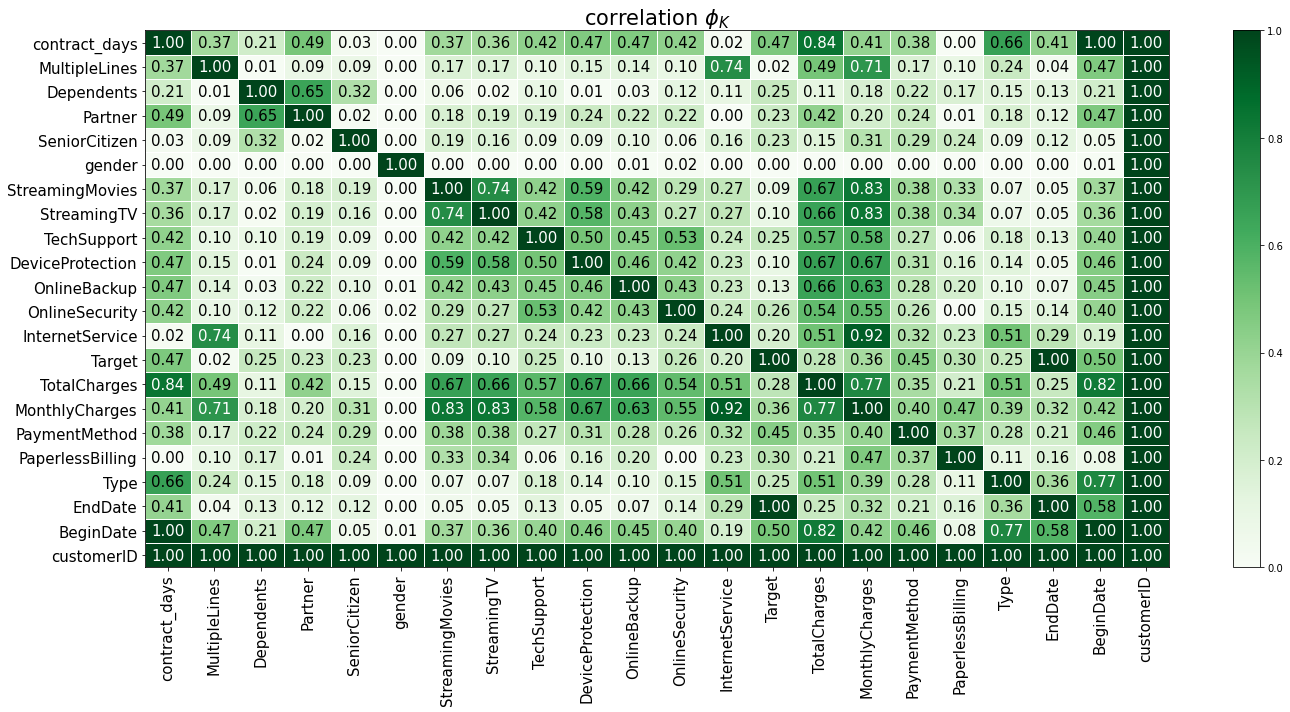

In [ ]:
# Создадим тепловую карту на основе библиотеки Phik
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(20, 10))
plt.tight_layout()

Можно отметить на тепловой карте библиотеки Phik, что столбец с ID клиента имеет абсолютную корреляцию со всеми значениями, что не удивительно, так как этот столбец имеет уникальные значения и все остальные признаки привязаны к нему. А вот пол клиента никак не влияет на продажи, срок договора или возможность ухода, поэтому столбец gender также будет необходимо убрать из обучающей выборки.

На тепловой карте также заметно, что все интернет услуги влияют на месячные и общие платежи, что логично, так как чем больше услуг подключено, тем выше платеж. Но так как платежи не являются в данном проекте целью, то эта корреляция не должна повлиять на качество модели.

Так как целевой столбец был создан на основе столбца с датой разрыва контракта, то корреляция равна единице. Столбец EndDate также необходимо убрать из обучающей выборки.

Общие траты имеют высокую корреляцию с количеством дней договора, что логично, чем дольше длится договор, тем больше денег принес клиент.

### <a id='toc1_3_17_'></a>[Графики в исследовательском анализе](#toc0_)

In [ ]:
# Зададим размер для всех графиков
plt.rcParams["figure.figsize"] = (20,8)

Посмотрим распределение платежей на графиках.

Сделаем гистограмму с основными значениями платежей в месяц.

Text(0, 0.5, 'Частота появления')

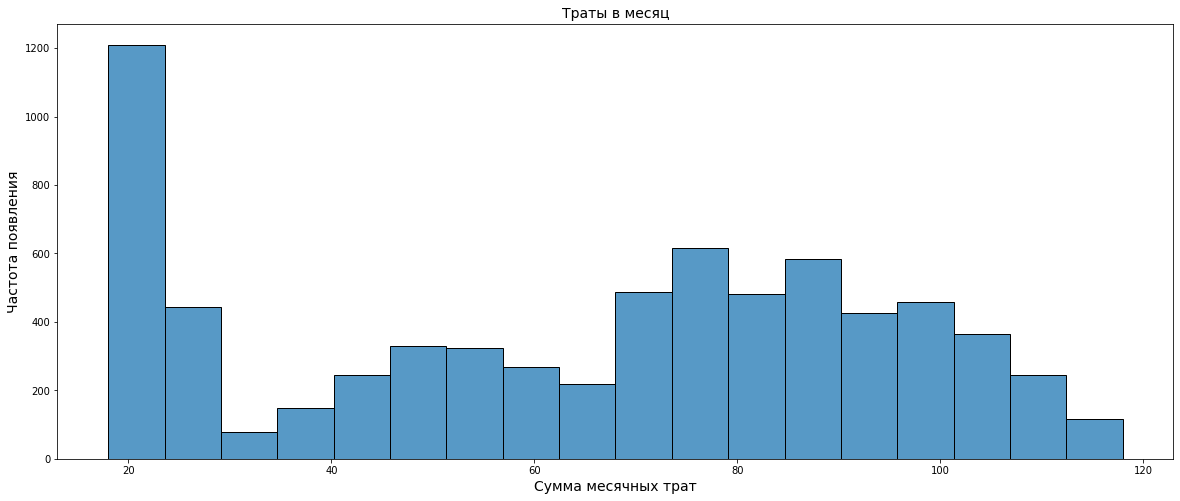

In [ ]:
sns.histplot(df_total['MonthlyCharges'])
plt.title('Траты в месяц', fontsize=14)
plt.xlabel('Сумма месячных трат', fontsize=14)
plt.ylabel('Частота появления', fontsize=14)

Можно отметить, что большую часть платежей составляют суммы от примерно 18 до 29 у.е. в месяц. При этом есть значительная часть клиентов, которые платят от 70 до 110 у.е. в месяц.

В целом, можно выделить несколько групп по месячным платежам:
- от 20 до 40,
- от 40 до 60,
- от 60 до 80,
- от 80 до 100,
- свыше 100

In [ ]:
# Создадим группировку по платежам в месяц
df_total['MonthlyChargesBox'] = pd.qcut(df_total['MonthlyCharges'], 5, labels=[1, 2, 3, 4, 5])

In [ ]:
# Посмотрим как получилось распределение в группах
df_total['MonthlyChargesBox'].value_counts(normalize=True)

1    0.223768
3    0.218941
4    0.194377
5    0.185716
2    0.177197
Name: MonthlyChargesBox, dtype: float64

Больше всего клиентов в группах, которые платят от 20 до 40 и в группе от 60 до 80 в месяц.

Сделаем гистограмму с общими значениями платежей.

Text(0, 0.5, 'Частота появления')

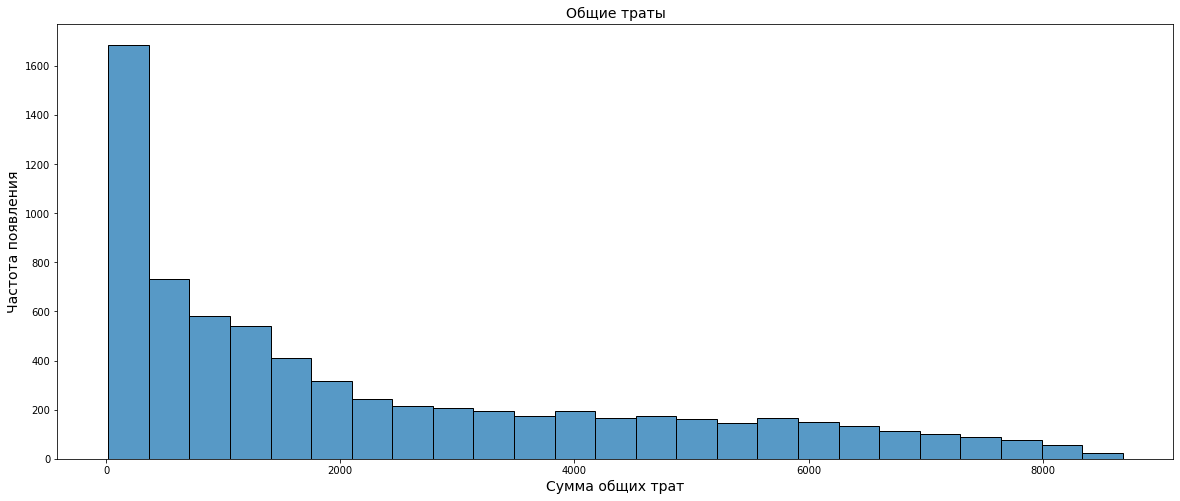

In [ ]:
sns.histplot(df_total['TotalCharges'])
plt.title('Общие траты', fontsize=14)
plt.xlabel('Сумма общих трат', fontsize=14)
plt.ylabel('Частота появления', fontsize=14)

Больше всего клиенты приносят до тысячи у.е., но есть те, кто уже успел принести больше 8000 у.е. Как мы знаем, это напрямую связано со сроками контракта, то есть это одни из самых старых клиентов.

Построим график с информацией о дате начала контракта.

Text(0, 0.5, 'Частота появления')

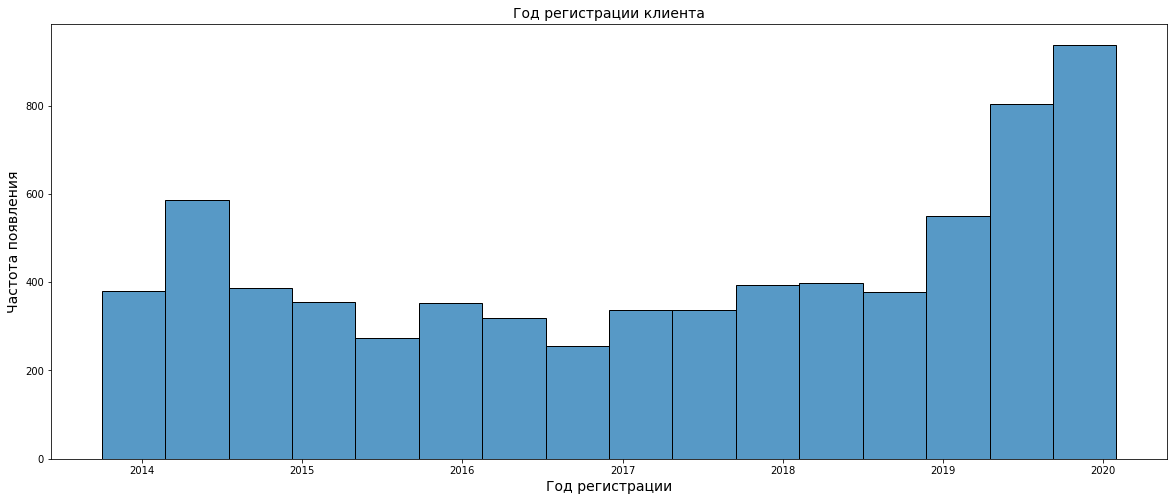

In [ ]:
sns.histplot(df_total['BeginDate'])
plt.title('Год регистрации клиента', fontsize=14)
plt.xlabel('Год регистрации', fontsize=14)
plt.ylabel('Частота появления', fontsize=14)

После активного подписания контрактов в 2014 году, количество новых стало постепенно уменьшаться вплоть до 2016-го года. Лишь только в 2019 году удалось исправить эту ситуацию, и пика удалось достичь лишь в 2020-ом году, в котором было подписано свыше 1400 новых договоров с клиентами.

Как мы знаем из исследования выше, компания как увеличила приток новых клиентов в 2019-ом году, так и клиенты также стали массово разрывать контракты в последние месяцы 2019-го и в начале 2020-го годов.

То есть, что-то привлекает клиентов (возможно, низкая цена услуг), но при этом через месяц-два клиенты уходят. Возможно, это связано с плохим качеством предоставляемых услуг. Требуется дополнительное исследование.

Построим график с оттоком клиентов по времени.

Text(0, 0.5, 'Частота появления')

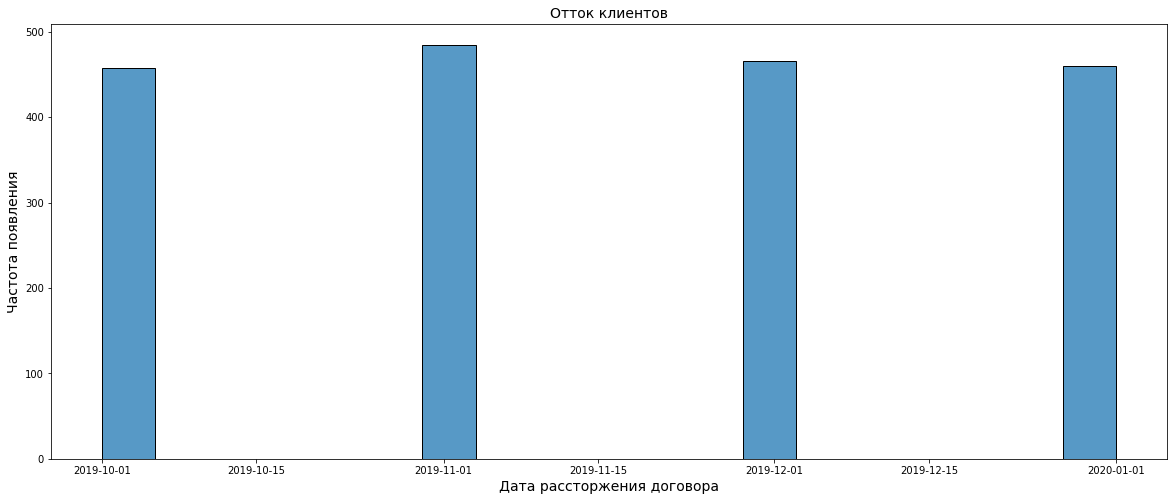

In [ ]:
# 2020-02-01 является заглушкой, уберем ее из графика
sns.histplot(df_total.query('EndDate != "2020-02-01"')['EndDate'])
plt.title('Отток клиентов', fontsize=14)
plt.xlabel('Дата рассторжения договора', fontsize=14)
plt.ylabel('Частота появления', fontsize=14)

Выделяются четыре даты, посмотрим на них подробнее.

In [ ]:
df_total.query('EndDate != "2020-02-01"')['EndDate'].value_counts()

2019-11-01    485
2019-12-01    466
2020-01-01    460
2019-10-01    458
Name: EndDate, dtype: int64

Все даты разрыва контракта приходятся на первое число месяца, то есть просто не продлевая его. Примерно одинаковое количество клиентов планомерно уходит в течение четырех месяцев.

Выведем график с типом договора, который выбирают клиенты.

Text(0, 0.5, 'Число договоров')

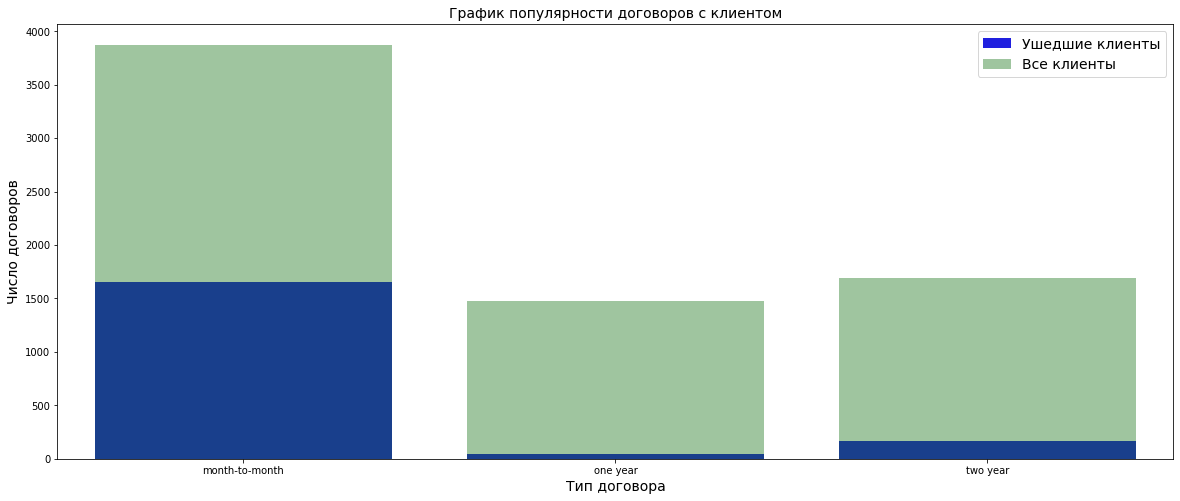

In [ ]:
ax = sns.countplot(x='Type', data=df_total.query('Target == 1'),
                color='blue', label='Ушедшие клиенты')

sns.countplot(x='Type', data=df_total, color='green',
            alpha=0.4, ax=ax, label='Все клиенты')
            
ax.legend(fontsize=14)
plt.title('График популярности договоров с клиентом', fontsize=14)
plt.xlabel('Тип договора', fontsize=14)
plt.ylabel('Число договоров', fontsize=14)

Чаще всего клиенты выбирают договор на месяц, именно такой договор автоматически прекращается. Меньше всего ушедших клиентов с договором на два года.

График с типом оплаты.

Text(0, 0.5, 'Частота появления')

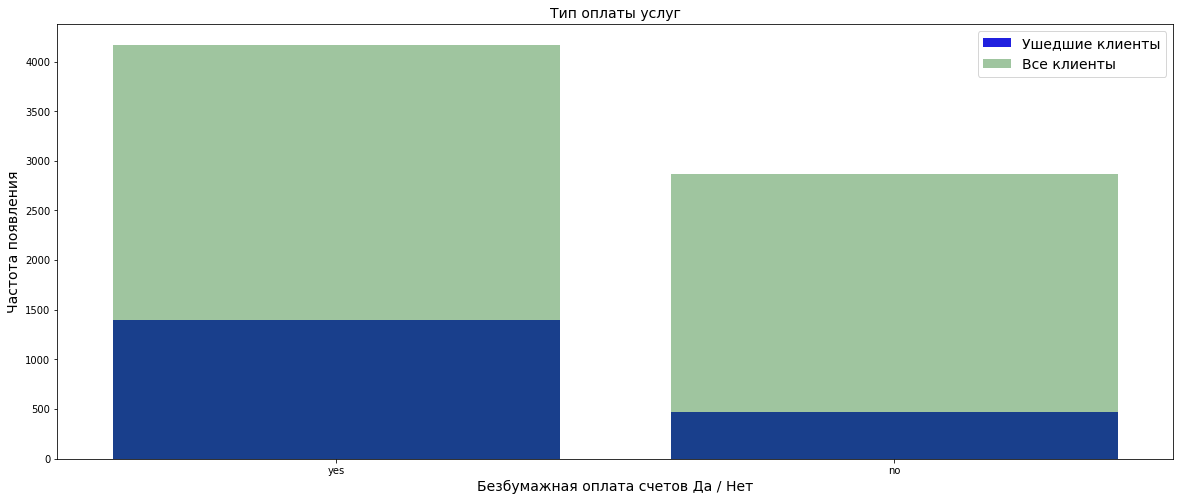

In [ ]:
ax = sns.countplot(df_total.query('Target == 1')['PaperlessBilling'],
                  color='blue', 
                  label='Ушедшие клиенты')
sns.countplot(df_total['PaperlessBilling'], color='green',
             ax=ax, 
             alpha=0.4, 
             label='Все клиенты')
ax.legend(fontsize=14)
plt.title('Тип оплаты услуг', fontsize=14)
plt.xlabel('Безбумажная оплата счетов Да / Нет', fontsize=14)
plt.ylabel('Частота появления', fontsize=14)

Соотношение ушедших клиентов к типу оплату примерно одинаковое.

Text(0, 0.5, 'Частота появления')

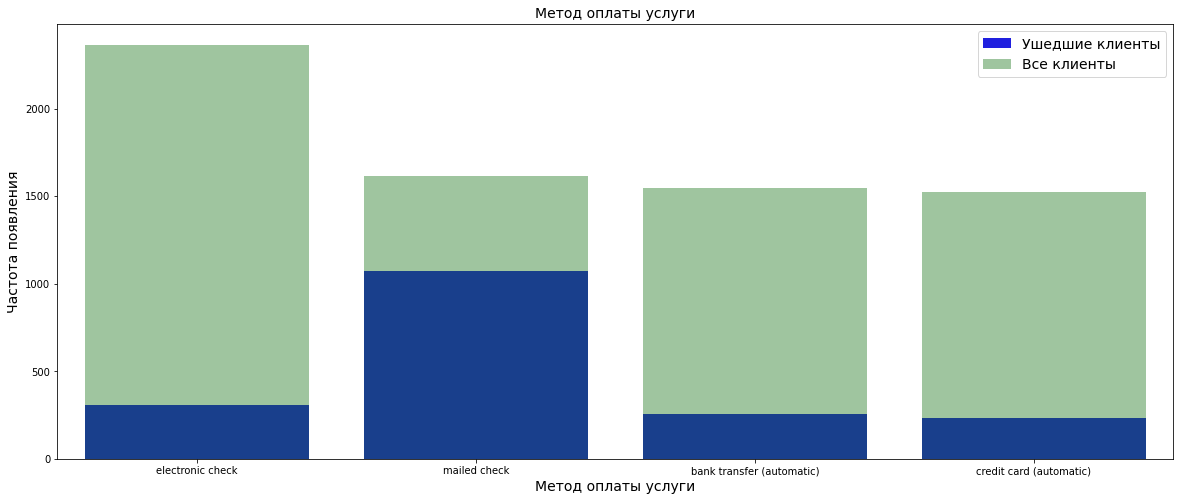

In [ ]:
ax = sns.countplot(df_total.query('Target == 1')['PaymentMethod'],
                  color='blue', 
                  label='Ушедшие клиенты')
sns.countplot(df_total['PaymentMethod'], color='green',
             ax=ax, 
             alpha=0.4, 
             label='Все клиенты')
ax.legend(fontsize=14)
plt.title('Метод оплаты услуги', fontsize=14)
plt.xlabel('Метод оплаты услуги', fontsize=14)
plt.ylabel('Частота появления', fontsize=14)

Чаще всего клиенты предпочитают электронный чек к оплате, но именно это категория клиентов чаще всего и уходит.

Text(0, 0.5, 'Частота появления')

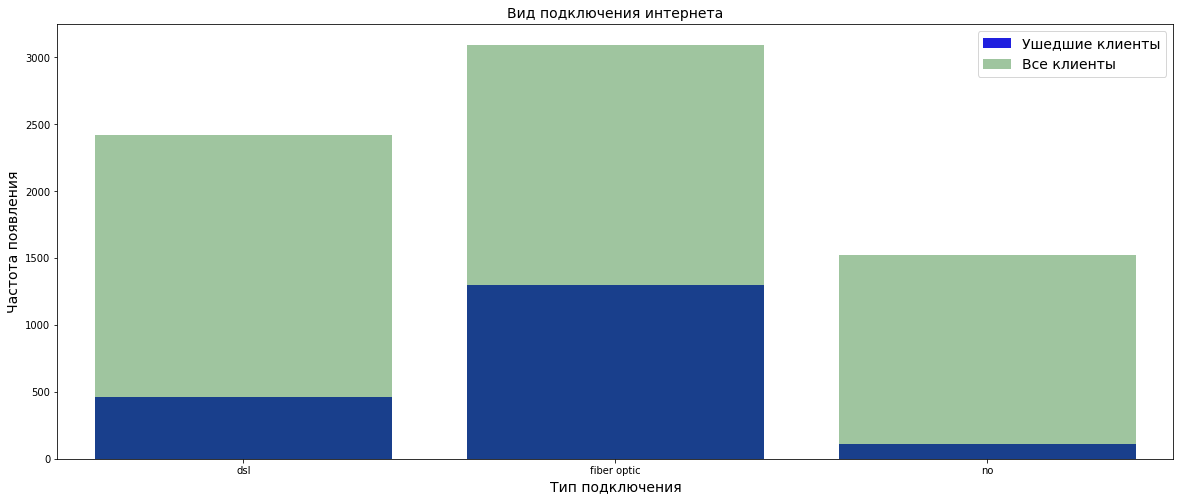

In [ ]:
ax = sns.countplot(df_total.query('Target == 1')['InternetService'],
                  color='blue', 
                  label='Ушедшие клиенты')
sns.countplot(df_total['InternetService'], color='green',
             ax=ax, 
             alpha=0.4, 
             label='Все клиенты')
ax.legend(fontsize=14)
plt.title('Вид подключения интернета', fontsize=14)
plt.xlabel('Тип подключения', fontsize=14)
plt.ylabel('Частота появления', fontsize=14)

Оптоволокно чаще всего предпочитают клиенты, но именно значительная их часть расторгла договор.

Построим график с ежемесячными платежами для всех клиентов и для ушедших.

Text(0, 0.5, 'Частота появления')

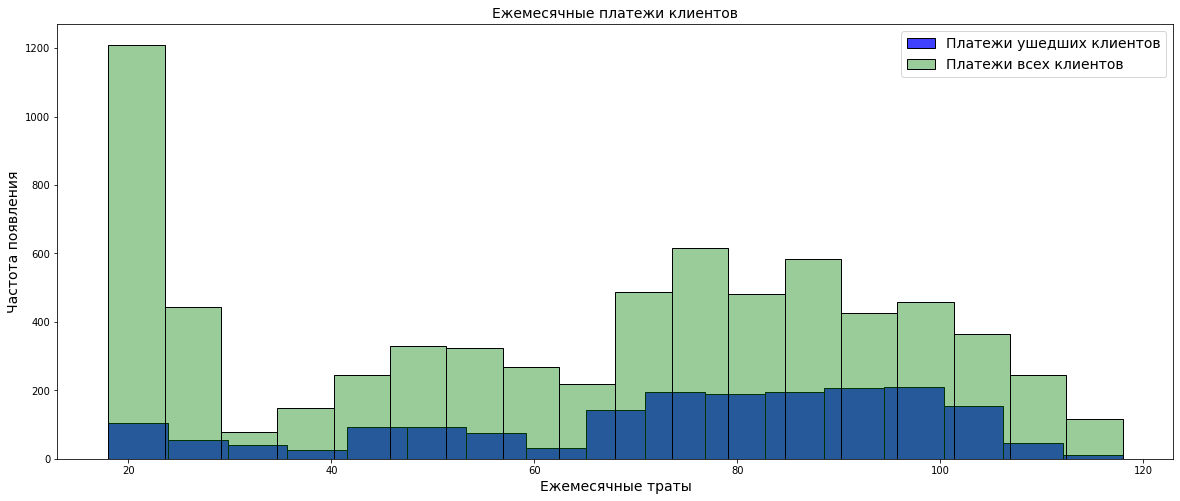

In [ ]:
ax = sns.histplot(df_total.loc[df_total['Target'] == 1,'MonthlyCharges'], color='blue', 
                  label='Платежи ушедших клиентов')
                  
sns.histplot(df_total['MonthlyCharges'], color='green', ax=ax, alpha=0.4, 
             label='Платежи всех клиентов')

ax.legend(fontsize=14)
plt.title('Ежемесячные платежи клиентов', fontsize=14)
plt.xlabel('Ежемесячные траты', fontsize=14)
plt.ylabel('Частота появления', fontsize=14)

Чаще уходят не те, кто платит меньше всех, а сразу две группы, от 60 до 80 и от 80 до 100.

Построим график срока жизни договора для ушедших клиентов.

Text(0, 0.5, 'Частота появления')

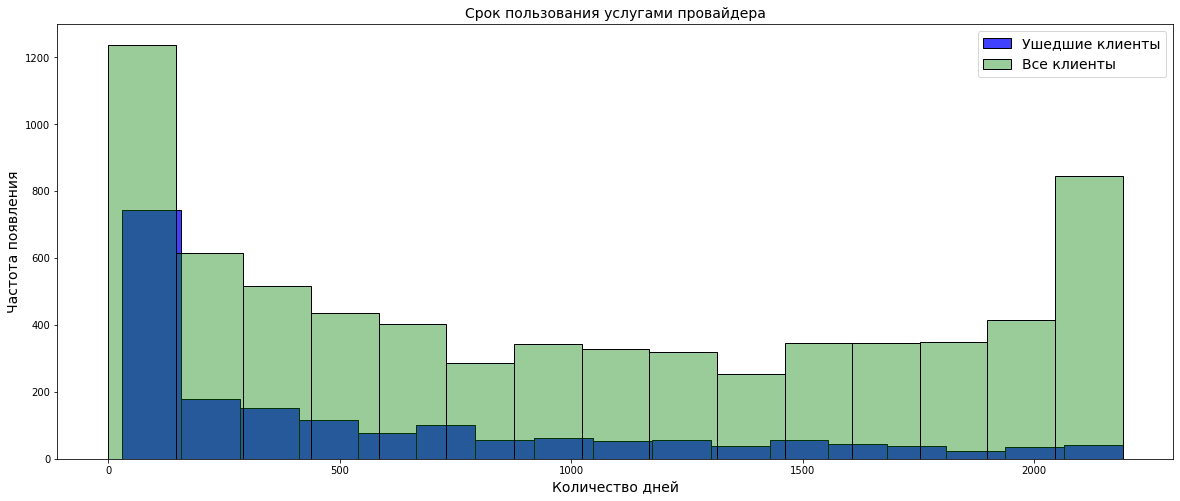

In [ ]:
ax = sns.histplot(df_total.query('Target == 1')['contract_days'],
                  color='blue', 
                  label='Ушедшие клиенты')
sns.histplot(df_total['contract_days'], color='green',
             ax=ax, 
             alpha=0.4, 
             label='Все клиенты')
ax.legend(fontsize=14)
plt.title('Срок пользования услугами провайдера', fontsize=14)
plt.xlabel('Количество дней', fontsize=14)
plt.ylabel('Частота появления', fontsize=14)

Больше всего клиентов расторгают договор в первые месяцы.

Создадим функцию для группировки клиентов.

In [ ]:
def client_grouping(column, data=df_total):
    
    client_grouping = df_total[['Target', 'customerID', column]].groupby(by=['Target', column]).count().reset_index()
    return client_grouping

Посмотрим распределение клиентов по количеству пользования дополнительными услугами для интернета.

In [ ]:
for i in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies']:
    display (client_grouping(column = i))

,Target,OnlineSecurity,customerID
0,0,no,3450
1,0,yes,1724
2,1,no,1574
3,1,yes,295


,Target,OnlineBackup,customerID
0,0,no,3268
1,0,yes,1906
2,1,no,1346
3,1,yes,523


,Target,DeviceProtection,customerID
0,0,no,3297
1,0,yes,1877
2,1,no,1324
3,1,yes,545


,Target,TechSupport,customerID
0,0,no,3440
1,0,yes,1734
2,1,no,1559
3,1,yes,310


,Target,StreamingTV,customerID
0,0,no,3281
1,0,yes,1893
2,1,no,1055
3,1,yes,814


,Target,StreamingMovies,customerID
0,0,no,3260
1,0,yes,1914
2,1,no,1051
3,1,yes,818


Только треть ушедших клиентов пользовались дополнительными услугами в сфере интернета, кроме стримингого телевидения и фильмов. Здесь их число достигает 80%.

Проверим есть ли среди ушедших клиентов, кто платит меньше 40 в месяц подключенное потоковое телевидение и фильмы.

In [ ]:
low_payment_with_tv_left = df_total[(df_total['StreamingTV'] == 'yes') & \
 (df_total['MonthlyCharges'] < 40) & \
    (df_total['Target'] == 1) \
 ]['customerID'].count()
low_payment_with_tv_left

12

In [ ]:
low_payment_with_movies_left = df_total[(df_total['StreamingMovies'] == 'yes') & \
 (df_total['MonthlyCharges'] < 40) & \
    (df_total['Target'] == 1) \
 ]['customerID'].count()
low_payment_with_movies_left

16

Можно говорить о том, что таких клиентов практически нет.

Посмотрим сколько ушло клиентов с высокими платежами в месяц, у которых есть подключенное потоковое телевидение.

In [ ]:
high_payment_with_tv_left = df_total[(df_total['StreamingTV'] == 'yes') & \
 (df_total['MonthlyCharges'] > 40) & \
 (df_total['MonthlyCharges'] < 120) & \
    (df_total['Target'] == 1) \
 ]['customerID'].count()
high_payment_with_tv_left

797

In [ ]:
high_payment_with_tv_left = df_total[(df_total['StreamingMovies'] == 'yes') & \
 (df_total['MonthlyCharges'] > 40) & \
 (df_total['MonthlyCharges'] < 120) & \
 (df_total['Target'] == 1) \
 ]['customerID'].count()
high_payment_with_tv_left

799

Компания теряет клиентов, которые приносили больше всего денег в месяц, и у многих из них было потоковое телевидение.

Посмотрим связана ли личная жизнь клиента со случаями рассторжения договора.

In [ ]:
for i in ['gender', 'SeniorCitizen', 'Partner','Dependents']:
    display(client_grouping(column = i))

,Target,gender,customerID
0,0,female,2549
1,0,male,2625
2,1,female,939
3,1,male,930


,Target,SeniorCitizen,customerID
0,0,0,4508
1,0,1,666
2,1,0,1393
3,1,1,476


,Target,Partner,customerID
0,0,no,2441
1,0,yes,2733
2,1,no,1200
3,1,yes,669


,Target,Dependents,customerID
0,0,no,3390
1,0,yes,1784
2,1,no,1543
3,1,yes,326


Женщины и мужчины уходили поровну. Лишь треть ушедших клиентов является пенсионерами, половина ушедших клиентов состоит в браке, и только пятая часть имеет детей. Можно сказать, что личная жизнь не влияла на решение рассторжения договора.

Многоканальная телефония.

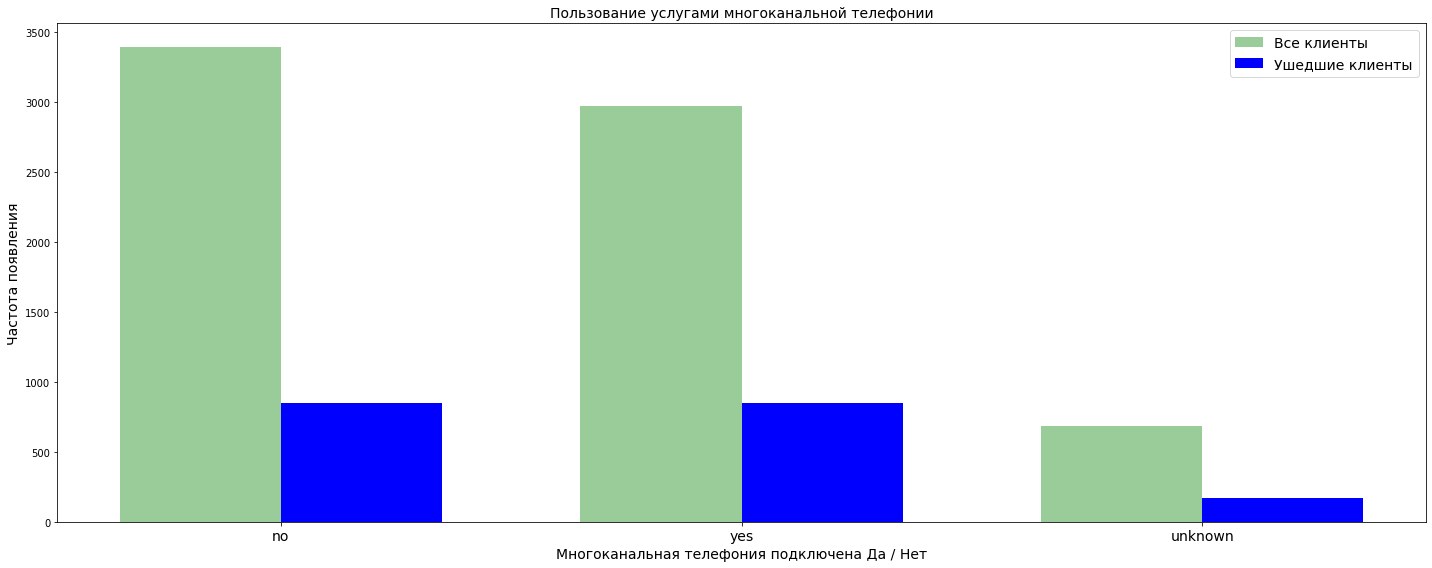

In [ ]:
target_1 = df_total.query('Target == 1')['MultipleLines']
all_types = df_total['MultipleLines']

target_1_counts = target_1.value_counts()
all_types_counts = all_types.value_counts()

index = np.arange(len(all_types_counts))
bar_width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(index, all_types_counts.values, bar_width, color='green', alpha=0.4, label='Все клиенты')
bar2 = ax.bar(index + bar_width, target_1_counts.values, bar_width, color='blue', label='Ушедшие клиенты')

ax.set_xlabel('Многоканальная телефония подключена Да / Нет', fontsize=14)
ax.set_ylabel('Частота появления', fontsize=14)
ax.set_title('Пользование услугами многоканальной телефонии', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(all_types_counts.index, fontsize=14)
ax.legend(fontsize=14)

plt.tight_layout()
plt.show()


Многоканальная телефония чуть менее популярна обычной, но клиенты в обоих случаях уходили одинаково.

### <a id='toc1_3_18_'></a>[Дисбаланс целевого столбца](#toc0_)

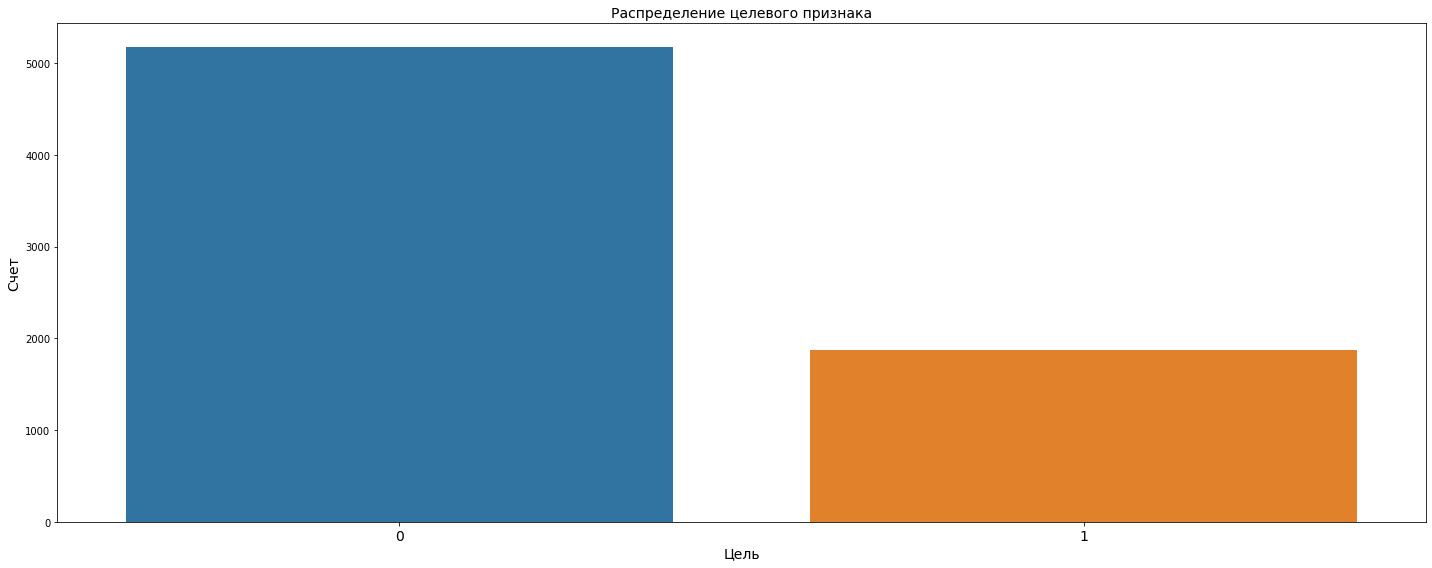

In [ ]:
# Проверим баланс в целевом столбце
sns.countplot(x='Target', data=df_total)

plt.xlabel('Цель', fontsize=14)
plt.ylabel('Счет', fontsize=14)
plt.title('Распределение целевого признака', fontsize=14)
plt.xticks([0, 1], ['0', '1'], fontsize=14)

plt.tight_layout()
plt.show()

Дисбаланс явно имеется, можно его исправить при помощи downsampling, но это не рекомендуется делать, так как наш датасет и так небольшой (меньше 10000 строк). Можно сделать upsampling, но у нас много признаков с двоичными значениями, это может негативно отразиться на точности предсказаний. Но так как в работе основной метрикой будет ROC-AUC, то дисбаланс не должен сказаться на результатах прогнозов.

Из статьи в интернете:



<font color='blue'> Расчетная формула：

F1-мера: 2 / (1 / P + 1 / R)

ROC / AUC: TPR = TP / (TP + FN), FPR = FP / (FP + TN)

ROC / AUC - те же критерии, а кривая PR (Precision-Recall) (оценка F1, Precision, Recall) - также те же критерии.

Реальные данные имеют тенденцию иметь дисбаланс между положительными и отрицательными образцами. Этот дисбаланс имеет большое влияние на PR, но не на ROC / AUC.

Таким образом, в реальном мире кривая PR используется больше, поскольку положительные и отрицательные выборки очень неравномерны. Кривая ROC / AUC не отражает производительность классификатора, но кривая PR может.

Если вы просто проведете эксперимент в исследовательских работах, вы можете использовать ROC, результаты эксперимента будут более красивыми. С другой стороны, кривую PR используют в реальной задаче, и она лучше интерпретируется. </font></div></font>

### <a id='toc1_3_19_'></a>[Общие выводы по исследовательскому анализу](#toc0_)

- Данные были объеденены в одну таблицу, из которой была создана еще одна, в которой категориальные признаки были заменены на цифровые значения. Обе эти таблицы будут использованы при обучении моделей.

- Был создан столбец с целевым признаком на основе данных об разрыве договора.

- Компания значительно увеличила приток новых клиентов с начала 2019-го года, но начала их терять с октября в начале 2020-го.

- Объединенные данные были проверены на корреляцию, избавлены от пропусков, была произведена корректировка типов данных, также данные были избавлены от неявных дубликатов путем понижения регистра, если такие имелись.



- Ушедшие клиенты обычно использовали договор на месяц, после чего разрывали договор.

- Почти все ушедшие клиенты не пользовались дополнительными услугами в сфере интернета.

- <font color='red'> У многих ушедших клиентов было подключено потоковое телевидение, при этом эти клиенты приносили больше всего прибыли </font></div></font>.

- Семейный статус и личная жизни практически не влияли на решение разорвать договор.

- Ввиду дисбаланса целевого признака, при разбивке таблиц будет использован гиперпараметр <font color='green'> stratify </font></div></font>.

- Данные подготовлены к процессу обучения моделей.

## <a id='toc1_4_'></a>[Обучение моделей](#toc0_)

### <a id='toc1_4_1_'></a>[Разбивка датасетов на тренировочную и тестовую выборки](#toc0_)

In [ ]:
df_total.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Target',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'contract_days', 'MonthlyChargesBox'],
      dtype='object')

Выделяем отдельно целевой столбец, и убираем столбцы, которые были использованы для исследовательского анализа и могут повлиять на работу моделей.

In [ ]:
target = df_total['Target']

features = df_total.drop(['Target', 'customerID', 'BeginDate', 'EndDate', 'gender', 'MonthlyChargesBox'], axis=1)

Из обучающих признаков убираем столбцы с датами и уникальные ID-пользователя, которые напрямую связаны с целевой колонкой.

In [ ]:
# Проверим работу кода для таблицы с категориальными признаками
print('Размер признаков:', features.shape)
print('Размер целевого признака:', target.shape)

Размер признаков: (7043, 17)
Размер целевого признака: (7043,)


Все данные распределились равномерно.

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, stratify=target, test_size=0.25, random_state=RANDOM_STATE)

In [ ]:
# проверка размера выборок с категориальными признаками
print('Размер тренировочной выборки признаков CAT:', features_train.shape, 
      'Размер целевого признака CAT:', target_train.shape)

print('Размер тестовой выборки признаков CAT:', features_test.shape, 
      'Размер целевого признака CAT:', target_test.shape)

Размер тренировочной выборки признаков CAT: (5282, 17) Размер целевого признака CAT: (5282,)
Размер тестовой выборки признаков CAT: (1761, 17) Размер целевого признака CAT: (1761,)


### <a id='toc1_4_2_'></a>[Проверка баланса распределения целевого признака](#toc0_)

In [ ]:
def target_balance(data):    
    target_balance = data.value_counts().to_frame()
    return target_balance

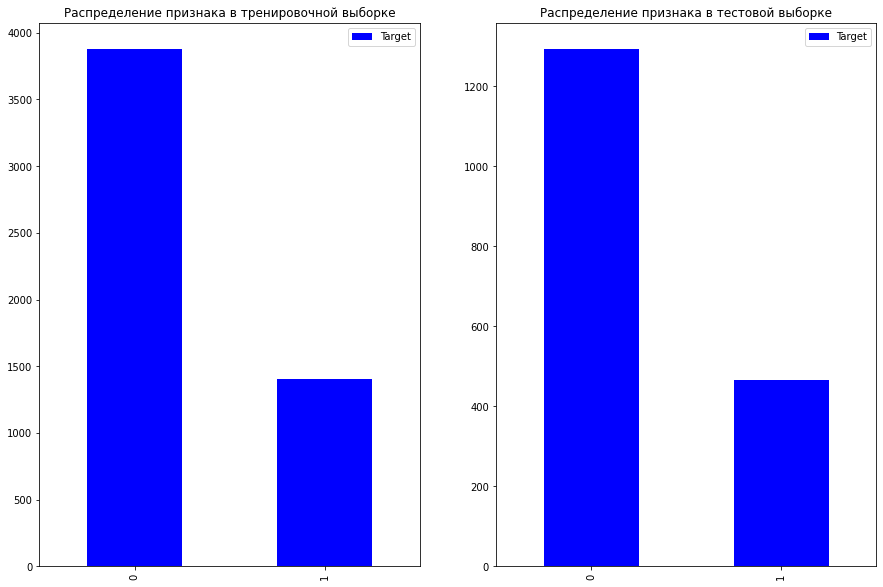

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))

target_balance(target_train).plot(kind='bar', ax=axes[0],
            color='blue').set_title('Распределение признака в тренировочной выборке')
target_balance(target_test).plot(kind='bar', ax=axes[1],
            color='blue').set_title('Распределение признака в тестовой выборке')
plt.show()

In [ ]:
pd.concat([target_train.value_counts(), target_test.value_counts()], axis=1)

,Target,Target
0,3880,1294
1,1402,467


Распределение целевого признака для обоих датасетов произошло равнономерно.

### <a id='toc1_4_3_'></a>[Обучение моделей](#toc0_)

#### <a id='toc1_4_3_1_'></a>[Логистическая регрессия](#toc0_)

In [ ]:
# Выделим цифровые и категориальные признаки
num_cols = [col for col in features_train.columns if features_train[col].dtype in [np.int32, np.int64]]
cat_cols = [col for col in features_train.columns if features_train[col].dtype == "object"]


# Создаем препроцессор
lr_preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop='first'), cat_cols)
    ])

# создаем пайплайн
lr_pipe = Pipeline([
    ("preprocessor", lr_preprocessor),
    ("classifier", LogisticRegression(random_state=RANDOM_STATE))
])

# Определяем  гиперпараметры для логистической регрессии
lr_param_grid = {
    "classifier__C": [0.1, 1, 10, 100],
    "classifier__penalty": ["l1", "l2"]
}

# Создаем грид-серч
lr_grid_search = GridSearchCV(lr_pipe, lr_param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

# Обучаем грид-серч на тренировочной выборке
lr_grid_search.fit(features_train, target_train)

print('Лучшие параметры для Логистичесткой Регрессии', lr_grid_search.best_params_)
print('Лучший эстиматор для Логистичесткой Регрессии', lr_grid_search.best_estimator_)
print('Лучший результат для Логистичесткой Регрессии', lr_grid_search.best_score_)

Лучшие параметры для Логистичесткой Регрессии {'classifier__C': 10, 'classifier__penalty': 'l2'}
Лучший эстиматор для Логистичесткой Регрессии Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['MonthlyCharges',
                                                   'TotalCharges',
                                                   'SeniorCitizen',
                                                   'contract_days']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Type', 'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'O

#### <a id='toc1_4_3_2_'></a>[Случайный лес](#toc0_)

In [ ]:
# Выделим цифровые и категориальные признаки
num_cols = [col for col in features_train.columns if features_train[col].dtype in [np.int32, np.int64]]
cat_cols = [col for col in features_train.columns if features_train[col].dtype == "object"]

# Создаем препроцессор
rf_preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OrdinalEncoder(), cat_cols)
    ])

# создаем пайплайн
rf_pipeline = Pipeline([
    ("preprocessor", rf_preprocessor),
    ("model", RandomForestClassifier(random_state=RANDOM_STATE))
])

# Определяем  гиперпараметры для Случайного леса
rf_param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [5, 10, 20],
    "model__min_samples_leaf": [1, 2, 4]
}

# Создаем грид-серч
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

# Обучаем грид-серч на тренировочной выборке
rf_grid_search.fit(features_train, target_train)

print('Лучшие параметры для Случайного леса', rf_grid_search.best_params_)
print('Лучший эстиматор для Случайного леса', rf_grid_search.best_estimator_)
print('Лучший результат для Случайного леса', rf_grid_search.best_score_)

Лучшие параметры для Случайного леса {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__n_estimators': 300}
Лучший эстиматор для Случайного леса Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['MonthlyCharges',
                                                   'TotalCharges',
                                                   'SeniorCitizen',
                                                   'contract_days']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['Type', 'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                 

#### <a id='toc1_4_3_5_'></a>[Категориальный бустинг](#toc0_)

In [ ]:
#Категориальный бустинг

cat_features = ['Type', 'PaperlessBilling', 'PaymentMethod', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport',
                 'StreamingTV', 'StreamingMovies', 'Partner', 'Dependents', 'MultipleLines']

cb_pipe = Pipeline([
    ('classifier', CatBoostClassifier(cat_features=cat_features, random_state=RANDOM_STATE))
])

cb_param_grid = {
    'classifier__iterations': [50, 100, 150],
    'classifier__depth': [3, 4, 5, 10],
    'classifier__learning_rate': [0.01, 0.05, 0.1]
}

cb_grid_search = GridSearchCV(cb_pipe, cb_param_grid, cv=5, verbose=1, n_jobs=-1, scoring='roc_auc')
cb_grid_search.fit(features_train, target_train)

print('Лучшие параметры для Категориального бустинга', cb_grid_search.best_params_)
print('Лучший эстиматор для Категориального бустинга', cb_grid_search.best_estimator_)
print('Лучший результат для Категориального бустинга', cb_grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
0:	learn: 0.6557230	total: 150ms	remaining: 22.3s
1:	learn: 0.6259677	total: 163ms	remaining: 12.1s
2:	learn: 0.6006658	total: 176ms	remaining: 8.63s
3:	learn: 0.5798952	total: 194ms	remaining: 7.06s
4:	learn: 0.5618087	total: 211ms	remaining: 6.12s
5:	learn: 0.5445729	total: 228ms	remaining: 5.47s
6:	learn: 0.5309440	total: 245ms	remaining: 5s
7:	learn: 0.5177252	total: 262ms	remaining: 4.64s
8:	learn: 0.5066137	total: 271ms	remaining: 4.25s
9:	learn: 0.4941815	total: 288ms	remaining: 4.04s
10:	learn: 0.4831200	total: 305ms	remaining: 3.86s
11:	learn: 0.4739070	total: 322ms	remaining: 3.7s
12:	learn: 0.4659109	total: 341ms	remaining: 3.6s
13:	learn: 0.4584273	total: 358ms	remaining: 3.48s
14:	learn: 0.4526590	total: 375ms	remaining: 3.38s
15:	learn: 0.4472204	total: 392ms	remaining: 3.29s
16:	learn: 0.4429758	total: 410ms	remaining: 3.21s
17:	learn: 0.4390551	total: 428ms	remaining: 3.14s
18:	learn: 0.4357056	total: 446ms	r

### <a id='toc1_4_4_'></a>[LightGBM](#toc0_)

In [ ]:
# Определяем категориальные и цифровые признаки
categorical_cols = [col for col in features_train.columns if features_train[col].dtype == "object"]
numerical_cols = [col for col in features_train.columns if features_train[col].dtype != "object"]


for c in categorical_cols:
    features_train[c] = features_train[c].astype('category')

numerical_transformer = StandardScaler()


preprocessor = ColumnTransformer(
transformers=[
("num", numerical_transformer, numerical_cols)
])


lgbm = LGBMClassifier(random_state=RANDOM_STATE)


lgbm_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
("lgbm", lgbm)])


lgbm_param_grid = {
"lgbm__n_estimators": [100, 500, 1000],
"lgbm__learning_rate": [0.01, 0.1, 0.5],
"lgbm__num_leaves": [31, 63, 127],
"lgbm__max_depth": [3, 6, 9]
}

lgbm_grid_search = GridSearchCV(lgbm_pipeline, lgbm_param_grid, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc')
lgbm_grid_search.fit(features_train, target_train)


print('Лучшие параметры для LightGBM', lgbm_grid_search.best_params_)
print('Лучший эстиматор для LightGBM', lgbm_grid_search.best_estimator_)
print('Лучший результат для LightGBM', lgbm_grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Лучшие параметры для LightGBM {'lgbm__learning_rate': 0.1, 'lgbm__max_depth': 3, 'lgbm__n_estimators': 1000, 'lgbm__num_leaves': 31}
Лучший эстиматор для LightGBM Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['MonthlyCharges',
                                                   'TotalCharges',
                                                   'SeniorCitizen',
                                                   'contract_days'])])),
                ('lgbm',
                 LGBMClassifier(max_depth=3, n_estimators=1000,
                                random_state=270123))])
Лучший результат для LightGBM 0.9089712193853219


##### <a id='toc1_4_4_1_1_'></a>[Сделаем итоговую таблицу для датасета с OE-кодировкой.](#toc0_)

| Модель   | Значение AUC            | | Подобранные гиперпараметры                                          |
|----------|-------------------------|-------------------------|---------------------------------------------|
| LR       | AUC: 0.8461630416695056 | | 'classifier__C': 10, 'classifier__penalty': 'l2' |
| RF       | AUC: 0.8639476343560502 | | 'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__n_estimators': 300 |
| CatB     | AUC: 0.8747351646890185 | | 'classifier__depth': 5, 'classifier__iterations': 150, 'classifier__learning_rate': 0.1|
| LGBM     | AUC: 0.9089712193853219 | | 'lgbm__learning_rate': 0.1, 'lgbm__max_depth': 3, 'lgbm__n_estimators': 1000, 'lgbm__num_leaves': 31|

Лучшие результат на тренировочной выборке достигнут на модели LightGBM.

## <a id='toc1_5_'></a>[Тестирование моделей](#toc0_)

### <a id='toc1_5_1_'></a>[LightGBM Classifier](#toc0_)

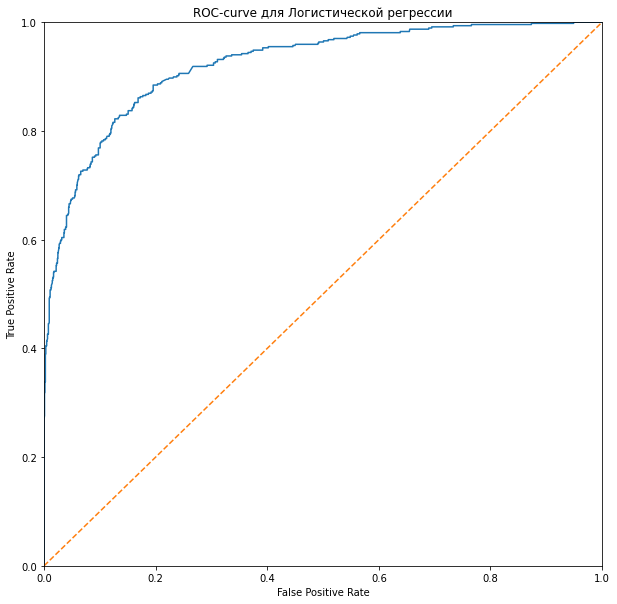

Accuracy: 0.8779102782509938
AUC: 0.9224819542675965


In [ ]:
#Инициализация модели LightGBM на тестовой выборке

lgbm_predicted = lgbm_grid_search.predict(features_test)
lgbm_probabilities = lgbm_grid_search.predict_proba(features_test)
lgbm_probabilities_one = lgbm_probabilities[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, lgbm_probabilities_one) 

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve для Логистической регрессии')

plt.show()

auc_roc = roc_auc_score (target_test, lgbm_probabilities_one)

print("Accuracy:", accuracy_score(target_test, lgbm_predicted))
print("AUC:", auc_roc)

Результат ROC-AUC = 0.922, цель достигнута на модели LightGBM.

### <a id='toc1_5_2_'></a>[DummyClassifier](#toc0_)

In [ ]:
dummy_class = DummyClassifier(strategy='most_frequent')
dummy_class.fit(features_train, target_train)

dummy_predicted = dummy_class.predict(features_test)

dummy_probabilities = dummy_class.predict_proba(features_test)
dummy_probabilities_one = dummy_probabilities[:, 1]

dummy_auc_roc = roc_auc_score(target_test, dummy_probabilities_one)

auc_roc = roc_auc_score (target_test, dummy_probabilities_one)

print("Accuracy:", accuracy_score(target_test, dummy_predicted))
print("AUC:", auc_roc)

Accuracy: 0.7348097671777399
AUC: 0.5


LightGBM Classifier обошел DummyClassifier по обоим показателям метрик точности и AUC.

### <a id='toc1_5_3_'></a>[Матрица ошибок для LightGBM Classifier](#toc0_)

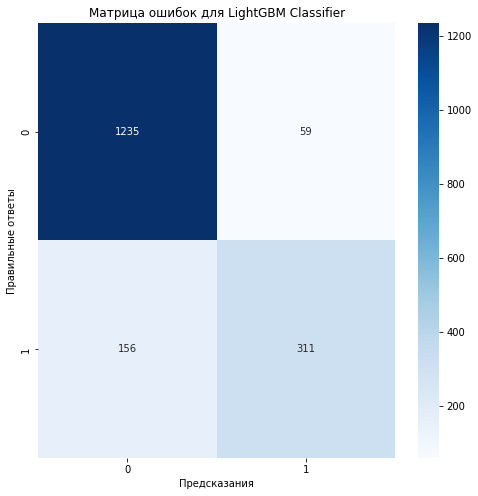

In [ ]:
# Построим график с матрицей ошибкок для тестовой модели

cmatrix = confusion_matrix(target_test, lgbm_predicted)
plt.figure(figsize=(8, 8))
sns.heatmap(cmatrix, 
            annot=True,  
            cmap='Blues', 
            fmt='d').set(title='Матрица ошибок для LightGBM Classifier',
            xlabel='Предсказания',
            ylabel='Правильные ответы')
plt.show()

Результат истинно-положительных решений по сравнению с ложно-положительными имеет очень хорошие показатели - 1235 к 59 соответственно.

### <a id='toc1_5_4_'></a>[Анализ важности признаков модели](#toc0_)

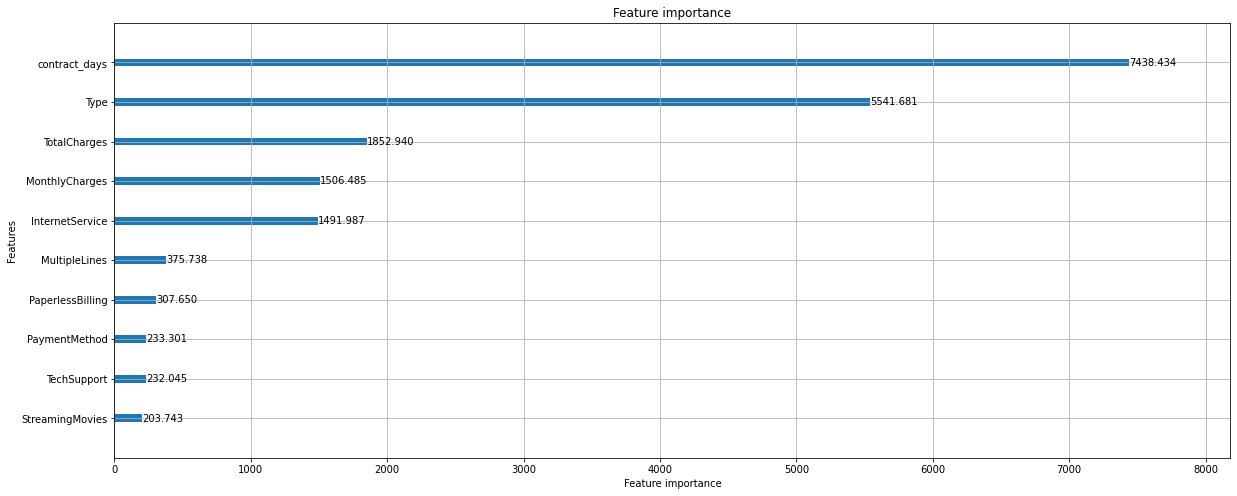

In [ ]:
# Построим график с важностью признаков модели
lgbm = LGBMClassifier(random_state=RANDOM_STATE)
lgbm.fit(features_train, target_train)

import matplotlib.pyplot as plt
import lightgbm as lgb

lgb.plot_importance(lgbm, max_num_features=10, importance_type='gain')
plt.show()


По графику видно, что самое большое значение имеет признак с количеством дней от начала действия договора, что логично, чем больше клиент пользуется услугами компании, тем меньше шансов что он уйдет. Также имеют значения суммы платежей и тип договора.

## <a id='toc1_6_'></a>[Общий вывод](#toc0_)

### <a id='toc1_6_1_'></a>[Цель проекта](#toc0_)

Целью данного проекта было создать модель машинного обучения, которая на основании полученных даннных будет предсказывать уход клиента от компании.

Основной метрикой для оценки качества и точности предсказания модели будет считаться AUC-ROC с показателем не ниже 0.85.

### <a id='toc1_6_2_'></a>[Данные для работы](#toc0_)

Для выполнения проекта были использованы следующие данные:

 - **df_contract** - эта таблица содержит информацию о клиентах, типе и сроке действия договора, а также месячные и общие платежи;
 - **df_personal** - эта таблица содержит информацию личной жизни клиента, его пол, статус пенсионера, семейный статус и наличие детей;
 - **df_internet** - эта таблица содержит информацию о подключенных интернет-услуга и их статусе;
 - **df_phone** - эта таблица содержит информацию о пользовании телефонными услугами и есть ли доступ к мультиканальной линии.

### <a id='toc1_6_3_'></a>[Предварительная обработка данных](#toc0_)

В предварительной обработке данных во всех таблицах была проведена следующая работа:
- был понижен регистр во всех столбцах, содержавшищих категориальные значения, чтобы убрать появление неявных дубликатов.
- Данные с датами были приведены к формату 'datetime', пропуски в столбце EndDate в виде значения "no" были заменены на заглушку '2020-02-01', которая равнялась дате выгрузке данных. При анализе данных эта дата не учитывалась и убиралась фильтрами.
- В столбце 'TotalCharges' были обнаружены пропуски в виде пробелов. Они были связаны с недавно заключенными договорами, все пропуски были заменены на значения из месячных платежей.
- На основании столбца со датами окончания договора был создан целевой столбец, где факт разрыва/сохранения договора получил соответствующие бинарные значения.


После предварительной обработки все таблицы были объеденены в одну, которая также была проверена на пропуски и дубликаты. Ввиду того, что количество строк не совпадает в таблицах, были обнаружены пропуски, которые были заменены на логически подобранные заглушки.

### <a id='toc1_6_4_'></a>[Исследовательский анализ данных](#toc0_)

Общая таблица дала возможность провести исследовательский анализ данных, на основе чего были получены следующие сведения:
- Начиная с 2019 года отмечен значительный рост количеста заключенных договоров.
- Большая часть договоров закрывается через 1-2 месяца, при этом большая часть договоров имеет срок действия на месяц с автоматической пролонгацией, но при этом клиенты просто перестают пользоваться услугами и оплачивать счета.
- Клиенты, которые имеют договор на год или на два очень редко уходят от провайдера.
- Восемьдесят процентов ушедших клиентов имели подключенное потоковое телевидение.
- При этом, все ушедшие клиенты платили от 60 до 120 в месяц. Пользователи с платежами до 30 редко разрывают договор. То есть компания теряет самых прибыльных пользователей.
- В течение четырех месяцев от даты загрузки данных компания теряет около 400 пользователей в месяц.
- Было выявлено, что семейный статус и личная жизнь клиента практически не имели значения для расторжения договора.

Данные были проверены на корреляцию с использованием библиотеки Phik, что помогло определить столбцы, которые имели прямое влияение на целевой, и должны быть убраны. Речь идет об уникальных ID клиента и датах рассторжения договора. При этом был добавлен столбец со сроками жизни договора.

При исследовательском анализе было определено, что целевой столбец имеет дисбаланс классов с разницей примерно в три раза. Но используемая метрика ROC_AUC не имеет большого влияния от дисбаланса цели. Тем не менее, при разбивке таблиц на обучающую и тренировочную был использован гиперпараметр "stratify", чтобы снизить возможное влияние на работу моделей.

### <a id='toc1_6_5_'></a>[Обучение моделей](#toc0_)

В проекте использовались следующие типы моделей:

- **LogisticRegression**,
- **RandomForestClassifier**,
- **CatBoostClassifier**,
- **LGBMClassifier**


Общая таблица была поделена на тренировочную и тестовую в соотношении 75/25. Все модели получали необработанные данные, при этом для каждой модели был выбран свой тип обработки данных для процесса обучения:

- Модель LogisticRegression получила OHE обработку категориальных данных, так как является линейной.
- Для модели RandomForestClassifier было использовано ОЕ-кодирование, так как алгоритм Случайный лес заключает в себе использование ансамбля решающих деревьев, которые предпочитают OE-обработку.
- Модель CatBoostClassifier получила сырые категориальные данные без какой-либо обработки.
- Для модели LGBMClassifier было использовано кодирование с заменой типа object на category.


Для всех моделей гиперпараметры были подобраны с использованием модели GridSearch с кросс-валидацией, а также Pipeline, который включал в себя предпроцессоры. В предпроцессорах было также использовано масшатибирование цифровых при помощи StandartScaler для снижения влияния выбросов на работу моделей машинного обучения.

### <a id='toc1_6_6_'></a>[Тестирование лучшей модели](#toc0_)

Лучшей моделью оказался классификатор LGBMClassifier с результатами:
 - На тренировочной выборке ROC_AUC - 0.908,
 - На тестовой выборке ROC_AUC - 0.922 с показателем точности равному 0.734

По этим показателям LGBMClassifier опережает все остальные модели и достигнутым на них результатов, именно поэтому модель LGBMClassifier была выбрана для тестирования.

 Эти результаты были сравнены с показателями, достигнутых на классификаторе DummyClassifier - это классификатор, который делает прогнозы, используя простые правила. DummyClassifier делает прогнозы, которые игнорируют входные функции и служит простой базой для сравнения с другими более сложными классификаторами. Можно говорить о том, что все модели показали лучший результат ROC-AUC чем DummyClassifier.

 Результаты работы были достигнуты для LightGBM при следующих гиперпараметрах:
 
  **{'lgbm__learning_rate': 0.1, 'lgbm__max_depth': 3, 'lgbm__n_estimators': 1000, 'lgbm__num_leaves': 31}**

  Для этой модели оказались самыми важными следующие признаки:
 - Contract_days,
 - Type,
 - MonthlyCharges,
 - TotalCharges,
 - InternetService

 Модель показала отличную способность в определение истинно-положительных целевых признаков, что дает возможность использовать ее с другими новыми данными при определении возможного оттока клиентов.


### <a id='toc1_6_7_'></a>[Итоги](#toc0_)

 - Все поставленные цели проекта были выполнены, контрольный порог ROC_AUC больше 0.85 был достигнут.
 - Определены признаки, которые могут влиять на возможность расторжения договора.
 - В ходе работы были обнаружены следующие сложности:
    - Определение корреляции и мультиколлинеарности для категориальных признаков, данная проблема была решена при помощи библиотеки Phik.
    - Неверное использование OHE и OE кодирования для категориальных данных до разбивки данных на обучающую и тестовую выборки, это привело к переписанию кода моделей и созданию предпроцессоров.
    - Неверное понимание принципа работы LightGBM с категориальными данными привело к многократному переписанию кода модели, но решением послужило переформатирование типа данных object в category, который по сути является OE-кодировкой.
    - Неправильный подход к выбору визуальной составляющей для графиков, необходимо учитывать количество выводимых признаков и от этого отталкиваться при выборе типа графика.
 - Можно определить следующие ключевые шаги в процессе создания отчета:
   - Загрузка и знакомство с данными,
   - Определение проблемных мест и их решение,
   - Исследовательский анализ, который позволил создать портрет ушедшего клиента, определение важных признаков, которые влияют на решение о расторжении договора.
   - Выбор моделей машинного обучения для классификации, их обучение.
   - Тестирование лучшей модели на тестовой выборке.
   - Анализ полученной лучшей модели, определение важных признаков и составление матрицы ошибок.